In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Предварительная обработка данных

In [3]:
rawData = pd.read_csv("C:\\DATA\\University\\Diploma\\Ismagilov_M.G\\Code\Adidas_Sales\\Adidas_US_Sales_Datasets.csv", delimiter = ";")
rawData.head(25)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01.01.2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1 200,$600 000,$300 000,50%,In-store
1,Foot Locker,1185732,02.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",1 000,$500 000,$150 000,30%,In-store
2,Foot Locker,1185732,03.01.2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",1 000,$400 000,$140 000,35%,In-store
3,Foot Locker,1185732,04.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",850,$382 500,$133 875,35%,In-store
4,Foot Locker,1185732,05.01.2020,Northeast,New York,New York,Men's Apparel,"$60,00",900,$540 000,$162 000,30%,In-store
5,Foot Locker,1185732,06.01.2020,Northeast,New York,New York,Women's Apparel,"$50,00",1 000,$500 000,$125 000,25%,In-store
6,Foot Locker,1185732,07.01.2020,Northeast,New York,New York,Men's Street Footwear,"$50,00",1 250,$625 000,$312 500,50%,In-store
7,Foot Locker,1185732,08.01.2020,Northeast,New York,New York,Men's Athletic Footwear,"$50,00",900,$450 000,$135 000,30%,Outlet
8,Foot Locker,1185732,21.01.2020,Northeast,New York,New York,Women's Street Footwear,"$40,00",950,$380 000,$133 000,35%,Outlet
9,Foot Locker,1185732,22.01.2020,Northeast,New York,New York,Women's Athletic Footwear,"$45,00",825,$371 250,$129 938,35%,Outlet


Пока действуем по упрощенной схеме


1.   Удаляем практически все столбцы ("Retailer", "Retailer ID", "Region", "State", "City", "Price per Unit", "Total Sales", "Operating Profit", "Operating Margin", "Sales Method")
2.   Полученные данные аггрегируем по дате, а также выравниваем количество записей по каждому продукту (чтобы для каждого продукта кол-во записей было одинаковое)



In [4]:
# Упрощенная схема: удаляем столбцы "Retailer", "Retailer ID", "Region", "State", "City", "Price per Unit", "Total Sales", "Operating Profit", "Operating Margin", "Sales Method"
rawData.drop(["Retailer", "Retailer ID", "Region", "State", "City", "Price per Unit", "Total Sales", "Operating Profit", "Operating Margin", "Sales Method"], axis=1, inplace=True)
rawData["Invoice Date"] = pd.to_datetime(rawData["Invoice Date"])
rawData["Units Sold"] = rawData["Units Sold"].str.replace(" ", "").astype("int32")
products = rawData["Product"].unique()
dateRange = pd.date_range(rawData["Invoice Date"].min(), rawData["Invoice Date"].max())
# Аггрегирование по дате  
aggregatedData = rawData.groupby(["Product", "Invoice Date"]).sum().reset_index()
filledData = pd.DataFrame()
for product in products:
  buffer = aggregatedData[aggregatedData["Product"] == product].copy()
  buffer.set_index("Invoice Date", inplace=True)
  # buffer = buffer.reindex(dateRange, fill_value=0).reset_index()
  buffer = buffer.reindex(dateRange).reset_index()
  buffer["Product"] = product
  if len(filledData) == 0:
    filledData = buffer
  else:
    filledData = pd.concat([filledData, buffer])
filledData.head(25)

C:\Users\ledni\AppData\Local\Temp\ipykernel_2684\1290403640.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  rawData["Invoice Date"] = pd.to_datetime(rawData["Invoice Date"])


,index,Product,Units Sold
0,2020-01-01,Men's Street Footwear,1920.0
1,2020-01-02,Men's Street Footwear,1134.0
2,2020-01-03,Men's Street Footwear,NaN
3,2020-01-04,Men's Street Footwear,NaN
4,2020-01-05,Men's Street Footwear,NaN
5,2020-01-06,Men's Street Footwear,688.0
6,2020-01-07,Men's Street Footwear,1064.0
7,2020-01-08,Men's Street Footwear,NaN
8,2020-01-09,Men's Street Footwear,NaN
9,2020-01-10,Men's Street Footwear,NaN


Посмотрим, что получилось.

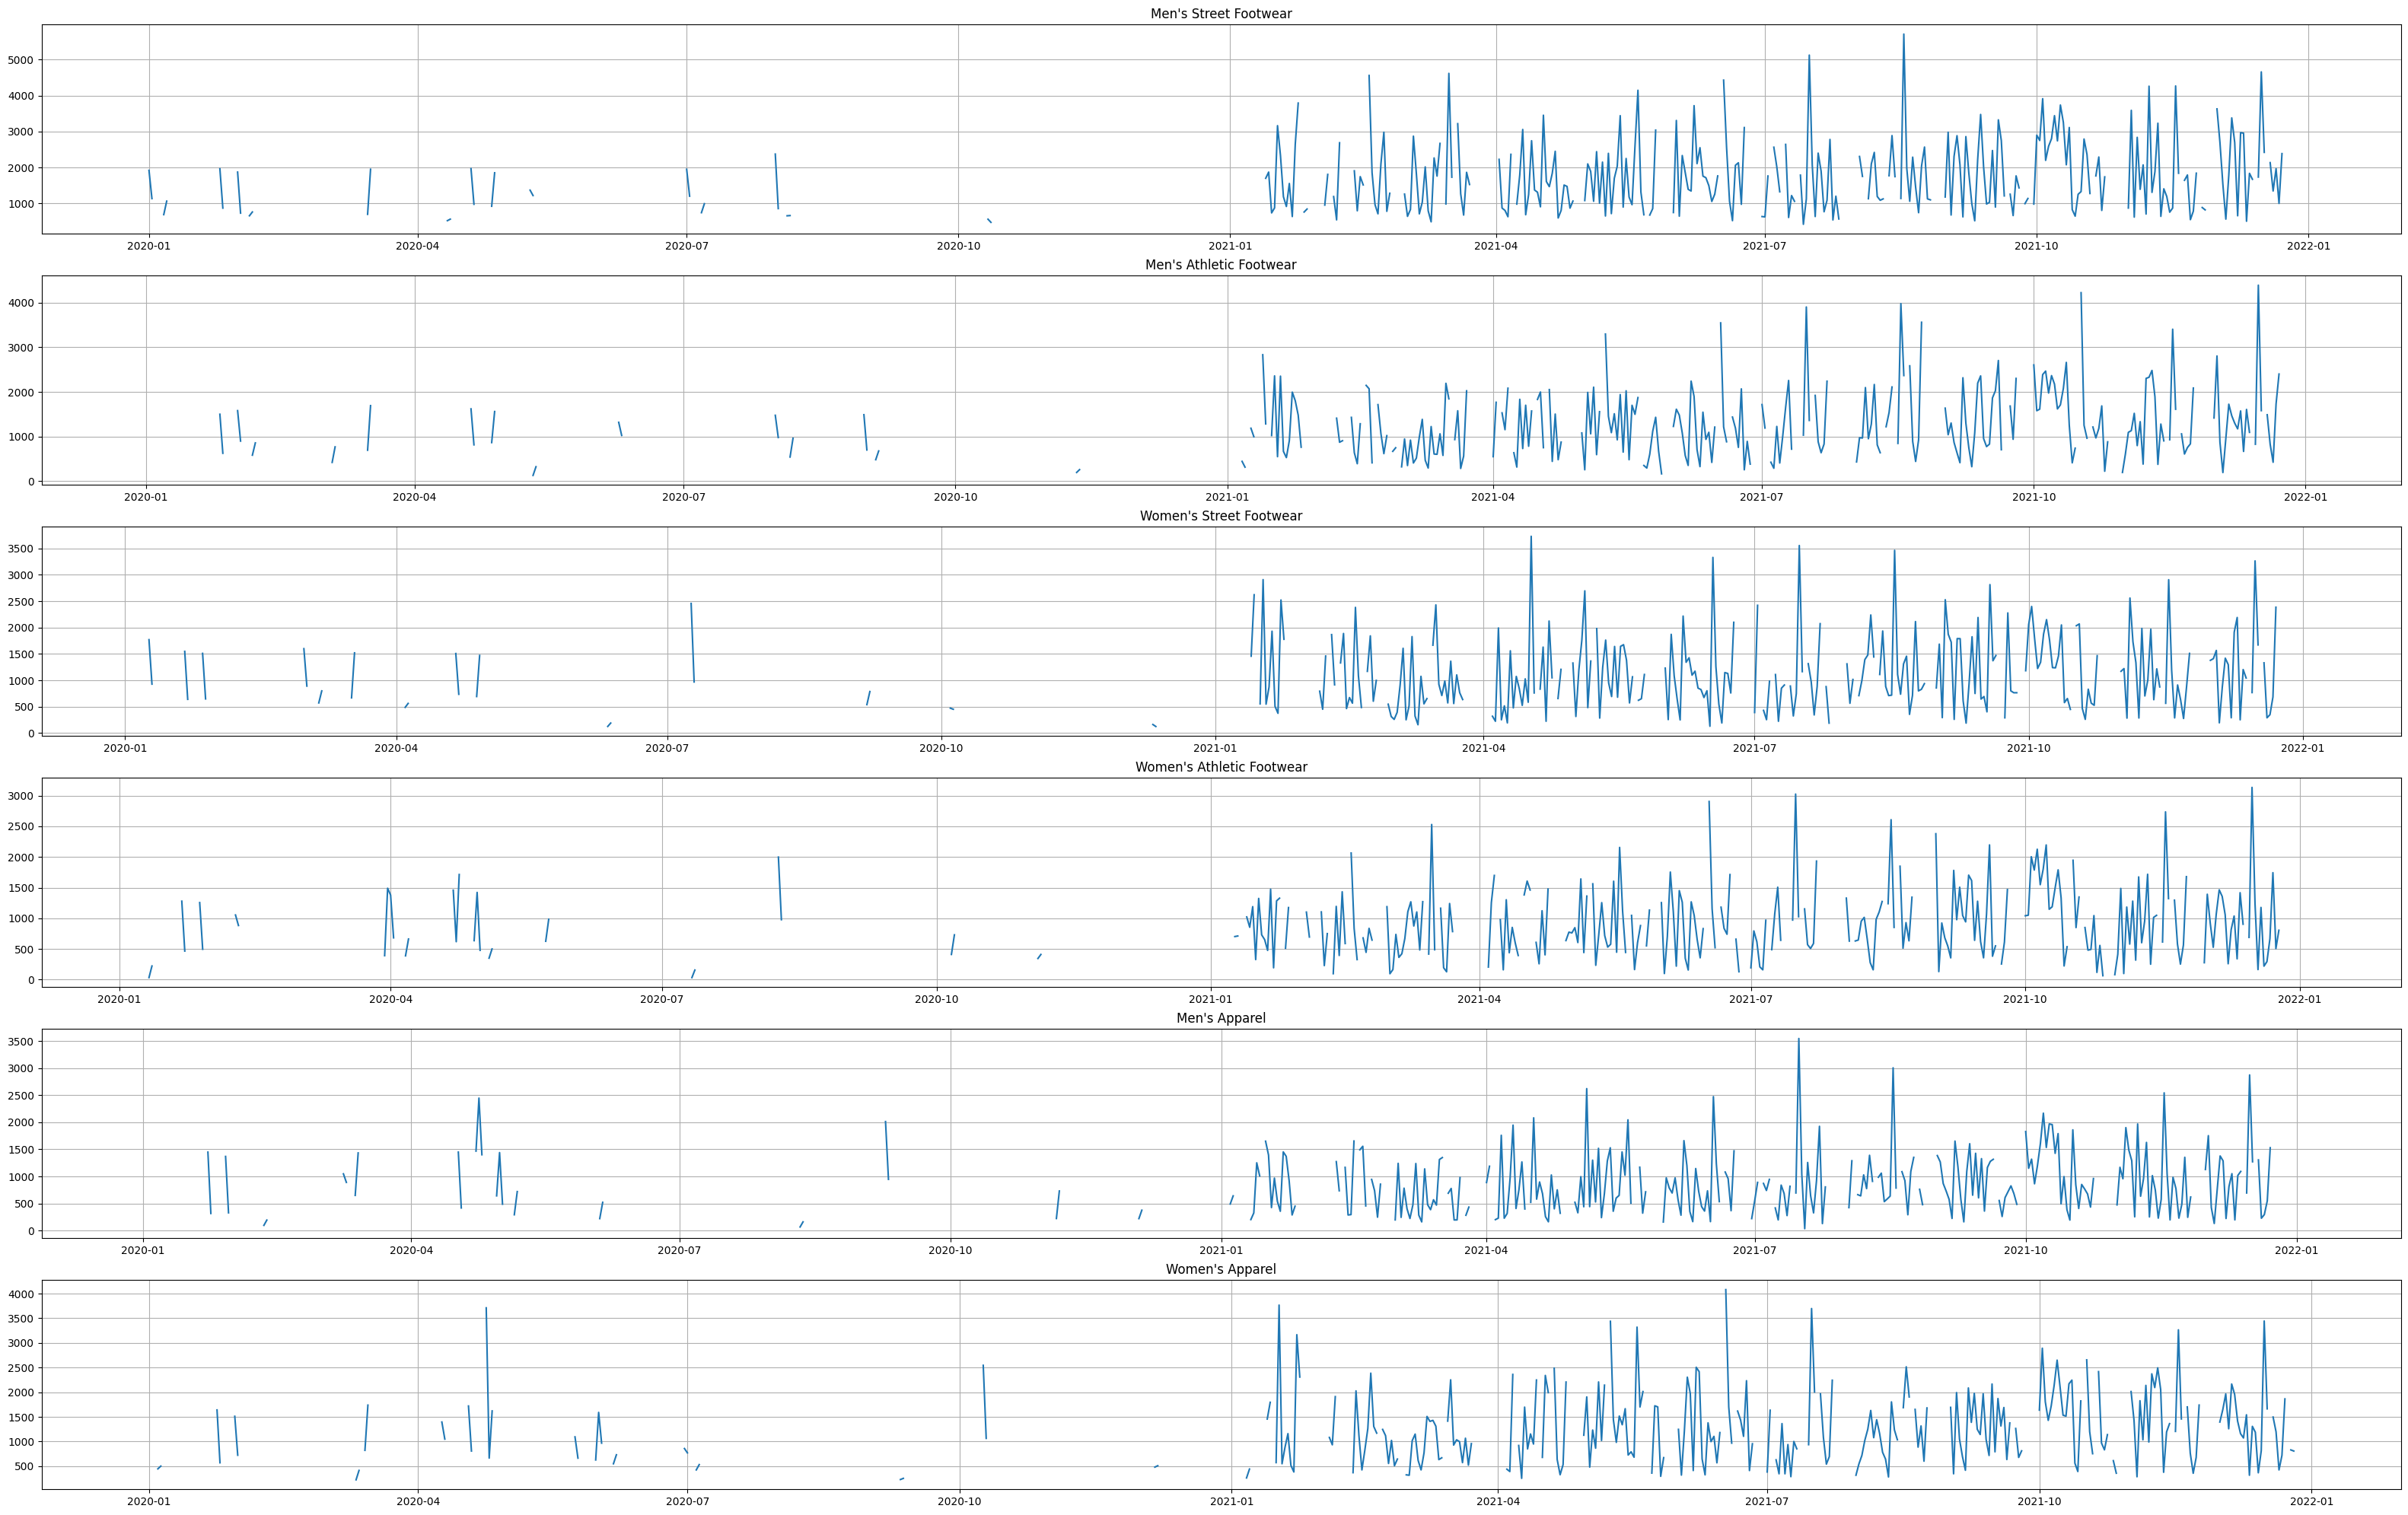

In [8]:
fig, axs = plt.subplots(6, 1, figsize=(40, 25))
for i, product in enumerate(filledData["Product"].unique()):
  buffer = filledData[filledData["Product"] == product].copy()
  buffer["index"] = pd.to_datetime(buffer["index"])
  axs[i].plot(buffer["index"], buffer["Units Sold"])
  axs[i].set_title(product)
  axs[i].grid()

Как видно, первая половина данных (за 2020 год) крайне разрежена: большую часть составляют пропуски.
Пытаться это как-то исправить считаю бесполезным и далее работать только с данными за 2021 год.

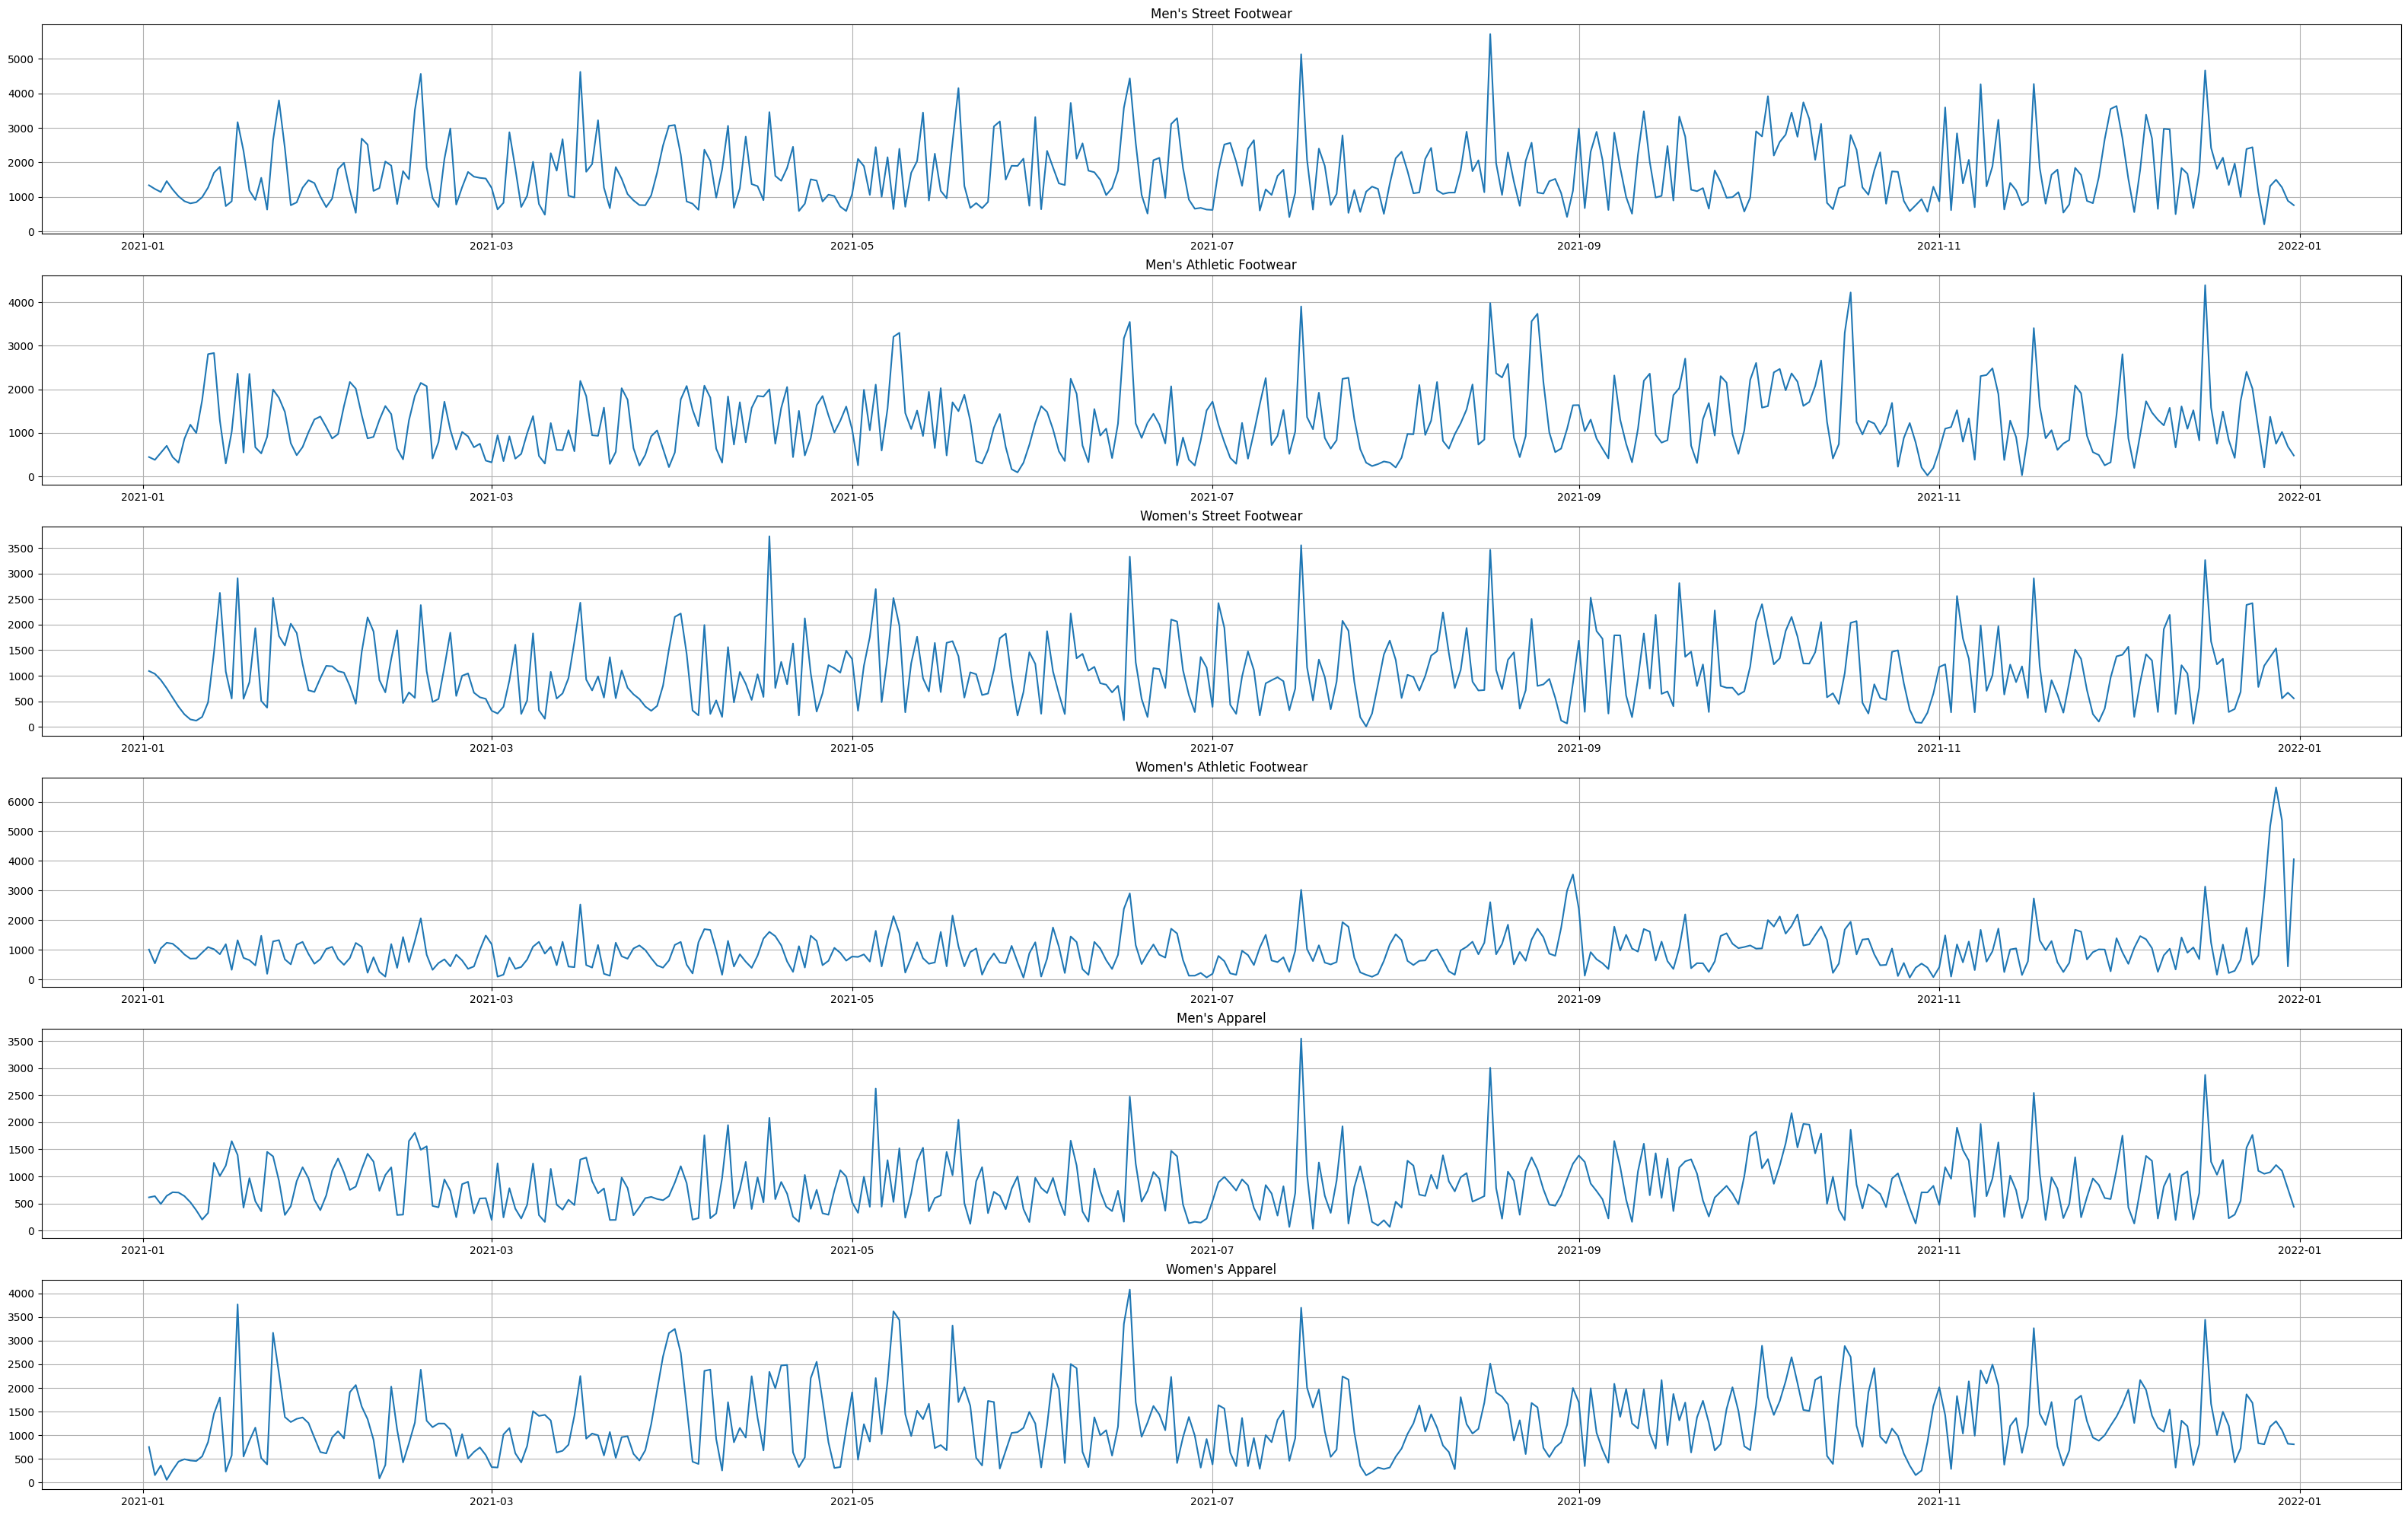

In [10]:
fig, axs = plt.subplots(6, 1, figsize=(40, 25))
cutData = pd.DataFrame()
for i, product in enumerate(filledData["Product"].unique()):
  buffer = filledData[(filledData["Product"] == product) & (filledData["index"] > "2021-01-01")].copy()
  buffer["index"] = pd.to_datetime(buffer["index"])
  buffer.sort_values(by="index", inplace=True)
  # Попробуем заполнение полиномиальным сплайном 3 порядка (отрицательные значения приравняем 0)
  buffer.loc[buffer["Units Sold"].isna(), "Units Sold"] = buffer["Units Sold"].interpolate(method="polynomial", axis=0, order=3)
  # Избавляемся отрезультата < 0 и оставшихся пропусков
  buffer.loc[buffer["Units Sold"] < 0, "Units Sold"] = np.nan
  roll = buffer["Units Sold"].rolling(10, center=True, min_periods=1).mean()
  buffer.loc[buffer["Units Sold"].isna(), "Units Sold"] = roll
  if len(cutData) == 0:
    cutData = buffer
  else:
    cutData = pd.concat([cutData, buffer])
  axs[i].plot(buffer["index"], buffer["Units Sold"])
  axs[i].set_title(product)
  axs[i].grid()

In [11]:
cutData.to_csv("C:\\DATA\\University\\Diploma\\Ismagilov_M.G\\Code\\Adidas_Sales\\sales_simplified.csv")

Теперь сформируем бейзлайн для полученных данных

In [12]:
rawData = pd.read_csv("C:\\DATA\\University\\Diploma\\Ismagilov_M.G\\Code\\Adidas_Sales\\sales_simplified.csv")
rawData.drop("Unnamed: 0", axis=1, inplace=True)

Сперва формально проверим ряды на стационарность (постоянство статистических показаттелей рядов, таких как среднее, СКО и пр. во времени)
Для этого есть множество статистических тестов (источник https://habr.com/ru/post/540868/):
1. Тест Дики — Фуллера,
2. Тест Филипса — Перрона,
3. Тест Лейбурна,
4. Тест Шмидта — Филлипса,
5. Тест Квятковского — Филлипса — Шмидта — Шина,
6. Тест DF — GLS,
7. Тест Кохрейн.

Пока ограничимся тестами Дики-Фуллера и Квятковского — Филлипса — Шмидта — Шина

Помимо статистических тестов для прверки стационарности рядов используют графики автокорреляционной и частично автокорреляционной функций. Также визуально оценивают графики скользящего среднего и скользящего СКО.

In [14]:
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm

Тест Дики-Фуллера

In [15]:
for product in rawData["Product"].unique():
  buffer = rawData[rawData["Product"] == product].copy()
  buffer["index"] =  pd.to_datetime(buffer["index"])
  buffer.sort_values(by="index", inplace=True)
  test = adfuller(buffer["Units Sold"])
  print("Product: '{}'\n\t'adf':{}\n\t'p-value: {}'\n\t'critical-values: {}'".format(product, test[0], test[1], test[4]))
  if test[1] > 0.05:
    print("\tРяд '{}' не стационарен: есть единичные корни\n".format(product))
  else:
    print("\tРяд '{}' стационарен: единичных корней нет\n".format(product))

Product: 'Men's Street Footwear'
	'adf':-7.235069299026881
	'p-value: 1.9491781912943962e-10'
	'critical-values: {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}'
	Ряд 'Men's Street Footwear' стационарен: единичных корней нет

Product: 'Men's Athletic Footwear'
	'adf':-5.3461984887881675
	'p-value: 4.389630990538624e-06'
	'critical-values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}'
	Ряд 'Men's Athletic Footwear' стационарен: единичных корней нет

Product: 'Women's Street Footwear'
	'adf':-6.838848360052653
	'p-value: 1.8129640472276981e-09'
	'critical-values: {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}'
	Ряд 'Women's Street Footwear' стационарен: единичных корней нет

Product: 'Women's Athletic Footwear'
	'adf':-7.021266638855541
	'p-value: 6.534058695487385e-10'
	'critical-values: {'1%': -3.4485948978753314, '5%': -2.86957971128312, '10%': -2.571053050314224}'
	Ряд 'Women's Athle

Любопытный результат: для каждого проукта p-value < 0,05, что говорит о стационарности процесса. Ктому же методика, использованная в статье https://habr.com/ru/post/540868/ свидетельствует о том же.

Тест Квятковского — Филлипса — Шмидта — Шина

In [16]:
for product in rawData["Product"].unique():
  buffer = rawData[rawData["Product"] == product].copy()
  buffer["index"] =  pd.to_datetime(buffer["index"])
  buffer.sort_values(by="index", inplace=True)
  test = kpss(buffer["Units Sold"])
  print("Product: '{}'\n\t'adf':{}\n\t'p-value: {}'\n\t'critical-values: {}'".format(product, test[0], test[1], test[3]))
  if test[1] < 0.05:
    print("\tРяд '{}' не стационарен\n".format(product))
  else:
    print("\tРяд '{}' стационарен\n".format(product))

Product: 'Men's Street Footwear'
	'adf':0.2119414736460471
	'p-value: 0.1'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Men's Street Footwear' стационарен

Product: 'Men's Athletic Footwear'
	'adf':0.3745882140981157
	'p-value: 0.0881085284059846'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Men's Athletic Footwear' стационарен

Product: 'Women's Street Footwear'
	'adf':0.11659743467865168
	'p-value: 0.1'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Women's Street Footwear' стационарен

Product: 'Women's Athletic Footwear'
	'adf':0.6651246523375888
	'p-value: 0.01671594069658284'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Women's Athletic Footwear' не стационарен

Product: 'Men's Apparel'
	'adf':0.6133191867989584
	'p-value: 0.021425528472821965'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Men's Appar

c:\Users\ledni\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\ledni\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
c:\Users\ledni\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Проведем аналогичные тесты для радов, усредненных по неделям.

In [17]:
# Усреднение по неделям: тест Дикки - Фуллера
for product in rawData["Product"].unique():
  buffer = rawData[rawData["Product"] == product].copy()
  buffer["index"] =  pd.to_datetime(buffer["index"])
  buffer.sort_values(by="index", inplace=True)
  buffer = buffer.resample("W", kind="timestamp", on="index").mean()
  test = adfuller(buffer["Units Sold"])
  print("Product: '{}'\n\t'adf':{}\n\t'p-value: {}'\n\t'critical-values: {}'".format(product, test[0], test[1], test[4]))
  if test[1] > 0.05:
    print("\tРяд '{}' не стационарен: есть единичные корни\n".format(product))
  else:
    print("\tРяд '{}' стационарен: единичных корней нет\n".format(product))

Product: 'Men's Street Footwear'
	'adf':-6.469178748637219
	'p-value: 1.3808276527063415e-08'
	'critical-values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}'
	Ряд 'Men's Street Footwear' стационарен: единичных корней нет

Product: 'Men's Athletic Footwear'
	'adf':-6.050820633227504
	'p-value: 1.2788801762326002e-07'
	'critical-values: {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}'
	Ряд 'Men's Athletic Footwear' стационарен: единичных корней нет

Product: 'Women's Street Footwear'
	'adf':-7.363335430422562
	'p-value: 9.375098220300731e-11'
	'critical-values: {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}'
	Ряд 'Women's Street Footwear' стационарен: единичных корней нет

Product: 'Women's Athletic Footwear'
	'adf':0.08078468287624126
	'p-value: 0.9647244221125502'
	'critical-values: {'1%': -3.60098336718852, '5%': -2.9351348158036012, '10%': -2.6059629803688282}'
	Ряд 'Women's Athletic

C:\Users\ledni\AppData\Local\Temp\ipykernel_2684\4241751851.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buffer = buffer.resample("W", kind="timestamp", on="index").mean()
C:\Users\ledni\AppData\Local\Temp\ipykernel_2684\4241751851.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buffer = buffer.resample("W", kind="timestamp", on="index").mean()
C:\Users\ledni\AppData\Local\Temp\ipykernel_2684\4241751851.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

In [18]:
# Усреднение по неделям: тест Квятковского — Филлипса — Шмидта — Шина
for product in rawData["Product"].unique():
  buffer = rawData[rawData["Product"] == product].copy()
  buffer["index"] =  pd.to_datetime(buffer["index"])
  buffer.sort_values(by="index", inplace=True)
  buffer = buffer.resample("W", kind="timestamp", on="index").mean()
  test = kpss(buffer["Units Sold"])
  print("Product: '{}'\n\t'adf':{}\n\t'p-value: {}'\n\t'critical-values: {}'".format(product, test[0], test[1], test[3]))
  if test[1] < 0.05:
    print("\tРяд '{}' не стационарен\n".format(product))
  else:
    print("\tРяд '{}' стационарен\n".format(product))

Product: 'Men's Street Footwear'
	'adf':0.3057043354425592
	'p-value: 0.1'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Men's Street Footwear' стационарен

Product: 'Men's Athletic Footwear'
	'adf':0.29768847350298744
	'p-value: 0.1'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Men's Athletic Footwear' стационарен

Product: 'Women's Street Footwear'
	'adf':0.12778683731204862
	'p-value: 0.1'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Women's Street Footwear' стационарен

Product: 'Women's Athletic Footwear'
	'adf':0.5783390111523342
	'p-value: 0.024605544440696885'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Women's Athletic Footwear' не стационарен

Product: 'Men's Apparel'
	'adf':0.6549461698087709
	'p-value: 0.01764125729011174'
	'critical-values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}'
	Ряд 'Men's Apparel' не стацион

C:\Users\ledni\AppData\Local\Temp\ipykernel_2684\240496468.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buffer = buffer.resample("W", kind="timestamp", on="index").mean()
c:\Users\ledni\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\ledni\AppData\Local\Temp\ipykernel_2684\240496468.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  buffer = buffer.resample("W", kin

Таким образом, данные за 2021 г. стационарные за исключением "Women's Athletic Footwear".
Теперь попробуем альтернативные способы проверки (на всякий случай).

Начнем с коррелограмм

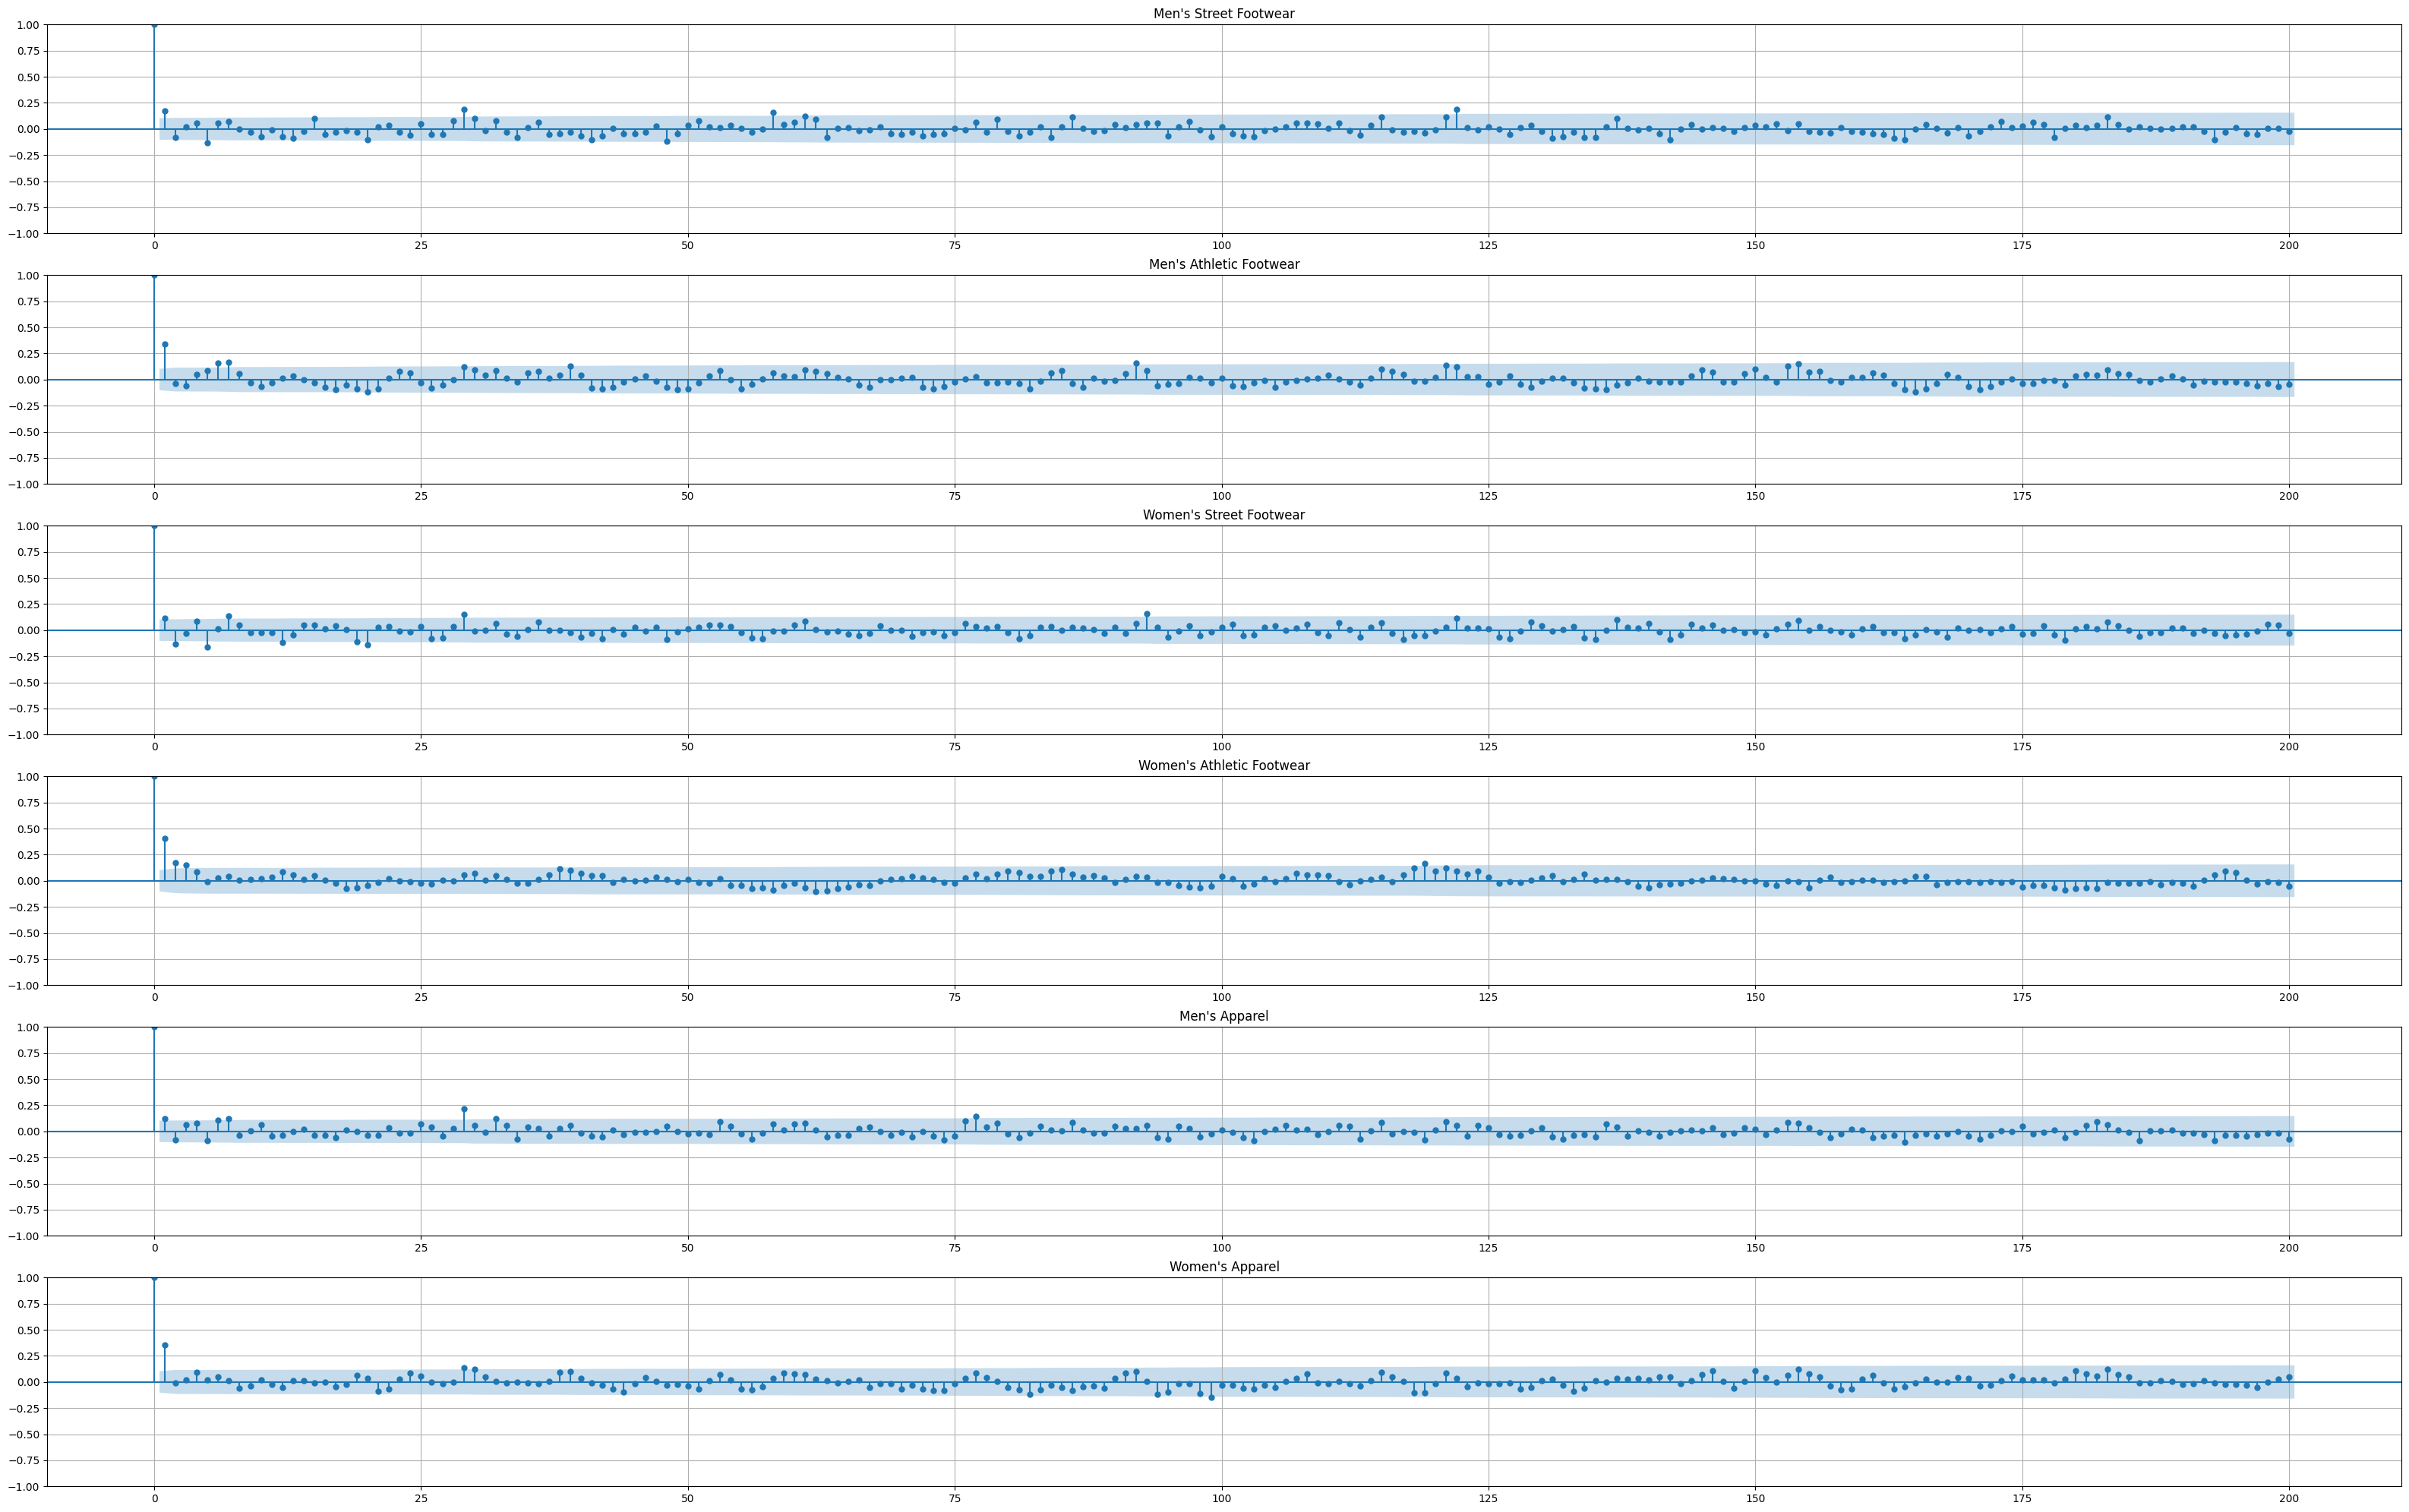

In [19]:
fig, axs = plt.subplots(6, 1, figsize=(40, 25))
for i, product in enumerate(rawData["Product"].unique()):
  Y = rawData[rawData["Product"] == product]["Units Sold"]
  sm.graphics.tsa.plot_acf(Y, lags=200, title=product, ax=axs[i])
  axs[i].grid()

Теперь посмотрим спектры, полученные в результате преобразования Фурье.

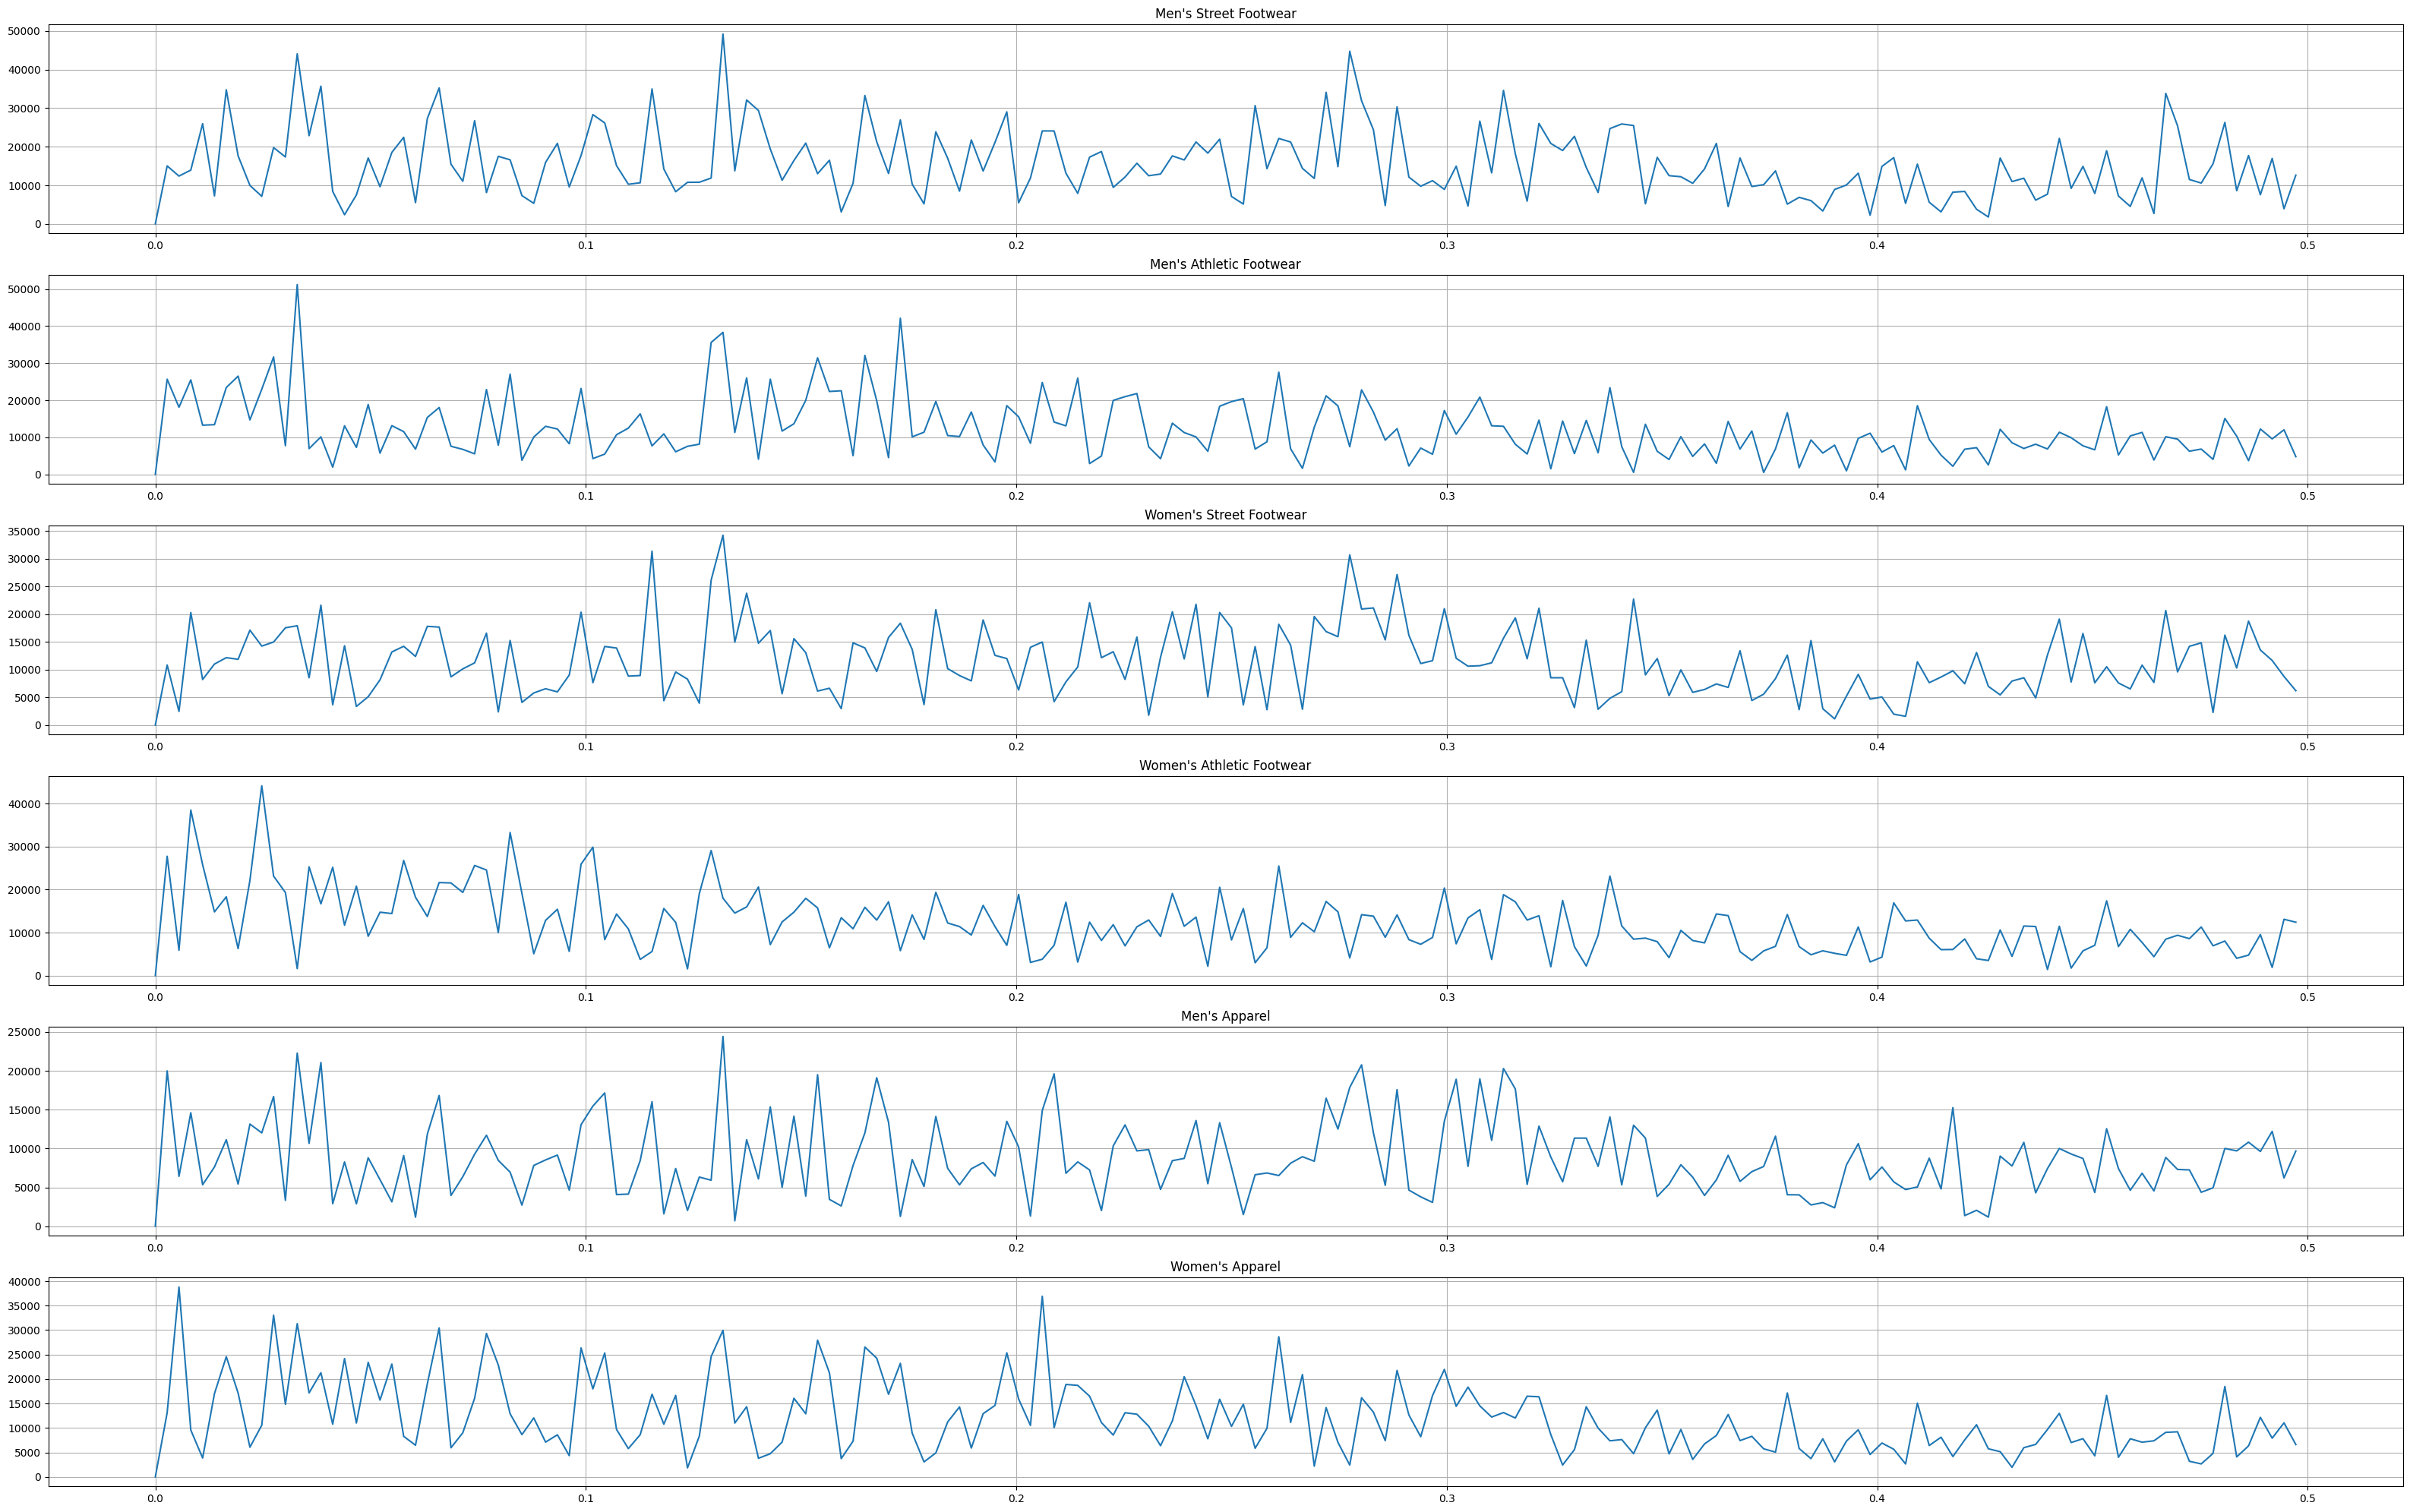

In [20]:
fig, axs = plt.subplots(6, 1, figsize=(40, 25))
for i, product in enumerate(rawData["Product"].unique()):
  # Т.к. видно, что тренд в данных постоянный, удалим его, чтобы было лучше видно сезонные компоненты
  Y = rawData[rawData["Product"] == product]["Units Sold"] - (rawData[rawData["Product"] == product]["Units Sold"]).mean()
  X_FFT = np.fft.fftfreq(len(Y))
  X_FFT = X_FFT[:len(X_FFT)//2]  
  Y_FFT = np.fft.fft(Y)
  Y_FFT = np.abs(Y_FFT[:len(Y_FFT)//2])
  axs[i].plot(X_FFT, Y_FFT)
  axs[i].set_title(product)
  axs[i].grid()

Несмотря на то, что статистическиетесты утверждают, что ряд по продукту "Women's Athletic Footwear" не стационарен, можно считать что все данные стационарны. Среднее значение ряда приблизительно постоянно, см. графики рядов и коррелограмму. Также Коррелограмма и спектр рядов свидетельствует об отсутствии сезонности в данных.

Обучим следующие модели:

1. Авторегрессионные модели (источники: https://habr.com/ru/post/180409/, https://habr.com/ru/post/207160/):
*  ARIMA
*  SARIMA
2. Спектральная модель (источник: https://habr.com/ru/company/glowbyte/blog/542940/).
3. Модель на основе случайного леса(https://machinelearningmastery.com/random-forest-for-time-series-forecasting/).
4. Нейронные сети (https://habr.com/ru/post/693562/, https://habr.com/ru/post/505338/).

В качестве метрики качества прогноза воспользуемся, **пока**, средней квадратичной ошибкой (Root Mean Squared Error (RMSE)):
$$RMSE = \sqrt {\frac{1}{N} \sum_{i=1}^{N} (\hat{y_{i}} - y_{i})^2}$$

В дальнейшем можно будет подобрать что-то получше.

Обучение моделей будет проводиться в отдельных блокнотах.